Let's start off with importing all the relevant libraries which will be updated as we go

In [63]:
import pandas as pd
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format

Read the csv file with the block names

In [2]:
df = pd.read_csv("G1 Competitors.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
A Block    10 non-null object
B Block    10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


Only 10 entries with No null objects which is good to see

In [4]:
df

,A Block,B Block
0,Hiroshi Tanahashi,Kazuchika Okada
1,Togi Makabe,Toru Yano
2,Tomohiro Ishii,Satoshi Kojima
3,Hirooki Goto,Michael Elgin
4,YOSHI-HASHI,Juice Robinson
5,Bad Luck Fale,Tama Tonga
6,Yuji Nagata,SANADA
7,Zack Sabre Jr.,EVIL
8,Kota Ibushi,Minoru Suzuki
9,Tetsuya Naito,Kenny Omega


Some of the wrestler's name have capitals while others don't, let's seperate these into two blocks and make sure we convert all strings to uppercase

In [172]:
A_Block = pd.DataFrame(df['A Block'].str.upper())
A_Block.columns = ['Wrestler']
B_Block = pd.DataFrame(df['B Block'].str.upper())
B_Block.columns = ['Wrestler']

In [173]:
A_Block

,Wrestler
0,HIROSHI TANAHASHI
1,TOGI MAKABE
2,TOMOHIRO ISHII
3,HIROOKI GOTO
4,YOSHI-HASHI
5,BAD LUCK FALE
6,YUJI NAGATA
7,ZACK SABRE JR.
8,KOTA IBUSHI
9,TETSUYA NAITO


In [113]:
type(A_Block)

pandas.core.frame.DataFrame

How many potential matches per block?
Using the old perpmuations formula

In [8]:
math.factorial(10)/(math.factorial(2)*math.factorial(10-2))

45.0

In [9]:
A_matches = pd.DataFrame.from_records(list(itertools.combinations(A_Block,2)), columns = ['Wrestler 1', 'Wrestler 2'])
B_matches = pd.DataFrame.from_records(list(itertools.combinations(B_Block,2)), columns = ['Wrestler 1', 'Wrestler 2'])
A_matches['Winner'] = np.NAN
B_matches['Winner'] = np.NAN
A_matches['Loser'] = np.NAN
B_matches['Loser'] = np.NAN
A_matches['Match'] = 1
B_matches['Match'] = 1

In [29]:
A_matches

,Wrestler 1,Wrestler 2,Winner,Loser,Match
0,HIROSHI TANAHASHI,TOGI MAKABE,NaN,NaN,1
1,HIROSHI TANAHASHI,TOMOHIRO ISHII,NaN,NaN,1
2,HIROSHI TANAHASHI,HIROOKI GOTO,NaN,NaN,1
3,HIROSHI TANAHASHI,YOSHI-HASHI,NaN,NaN,1
4,HIROSHI TANAHASHI,BAD LUCK FALE,NaN,NaN,1
5,HIROSHI TANAHASHI,YUJI NAGATA,NaN,NaN,1
6,HIROSHI TANAHASHI,ZACK SABRE JR.,NaN,NaN,1
7,HIROSHI TANAHASHI,KOTA IBUSHI,NaN,NaN,1
8,HIROSHI TANAHASHI,TETSUYA NAITO,NaN,NaN,1
9,TOGI MAKABE,TOMOHIRO ISHII,NaN,NaN,1


In [16]:
def updateresults(df,winner,loser):
    winner = winner.upper()
    loser = loser.upper()
    w1 = list(df[df['Wrestler 1'].str.contains(winner)].index)
    w2 = list(df[df['Wrestler 2'].str.contains(winner)].index)
    w3 = w1 + w2
    if not w1:
        winner = df.iloc[w2[0],1]
    else:
        winner = df.iloc[w1[0],0]

    l1 = list(df[df['Wrestler 1'].str.contains(loser)].index)
    l2 = list(df[df['Wrestler 2'].str.contains(loser)].index)
    l3 = l1 + l2
    if not l1:
        loser = df.iloc[l2[0],1]
    else:
        loser = df.iloc[l1[0],0]
    i = list(set(w3).intersection(l3))
    i = i[0]
    print(winner + ',' +loser)
    df.iloc[i,2] = winner
    df.iloc[i,3] = loser
    
    

In [30]:
updateresults(A_matches, 'Zack', 'Tanahashi')
updateresults(A_matches, 'YOSHI', 'Nagata')
updateresults(A_matches, 'Fale', 'Togi')
updateresults(A_matches, 'Hirooki', 'Tomohiro')
updateresults(A_matches, 'Tetsuya', 'Kota')

ZACK SABRE JR.,HIROSHI TANAHASHI
YOSHI-HASHI,YUJI NAGATA
BAD LUCK FALE,TOGI MAKABE
HIROOKI GOTO,TOMOHIRO ISHII
TETSUYA NAITO,KOTA IBUSHI


In [91]:
def updatetables():
    A_Table = pd.DataFrame(A_matches.groupby(['Winner'])['Match'].sum()*2).reset_index()
    A_Table.columns = ['Wrestler','Points']
    B_Table = pd.DataFrame(B_matches.groupby(['Winner'])['Match'].sum()*2).reset_index()
    B_Table.columns = ['Wrestler','Points']

SyntaxError: invalid syntax (<ipython-input-91-630e4ddecf93>, line 2)

In [161]:
A_Table

,Wrestler,Points
0,BAD LUCK FALE,2
1,HIROOKI GOTO,2
2,TETSUYA NAITO,2
3,YOSHI-HASHI,2
4,ZACK SABRE JR.,2


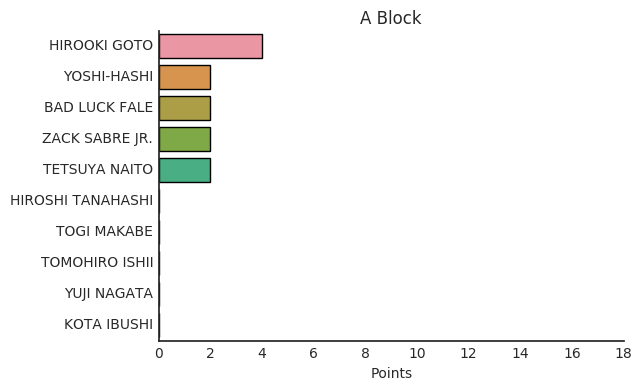

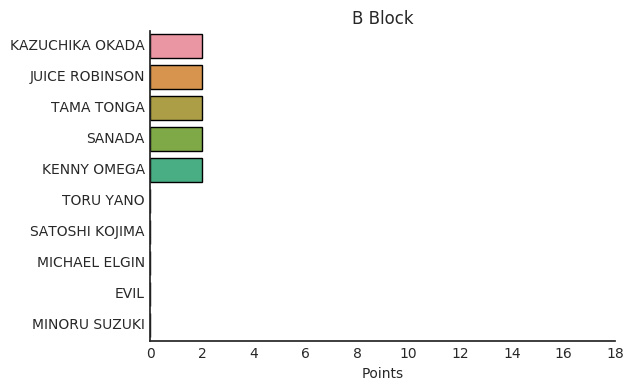

In [210]:
ax= sns.barplot(y='Wrestler', x='Points', data=A_Block)
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('') 
ax.set_title('A Block')
plt.show()
ax= sns.barplot(y='Wrestler', x='Points', data=B_Block)
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('') 
ax.set_title('B Block')
plt.show()

In [98]:
B_matches

,Wrestler 1,Wrestler 2,Winner,Loser,Match
0,KAZUCHIKA OKADA,TORU YANO,NaN,NaN,1
1,KAZUCHIKA OKADA,SATOSHI KOJIMA,NaN,NaN,1
2,KAZUCHIKA OKADA,MICHAEL ELGIN,NaN,NaN,1
3,KAZUCHIKA OKADA,JUICE ROBINSON,NaN,NaN,1
4,KAZUCHIKA OKADA,TAMA TONGA,NaN,NaN,1
5,KAZUCHIKA OKADA,SANADA,NaN,NaN,1
6,KAZUCHIKA OKADA,EVIL,NaN,NaN,1
7,KAZUCHIKA OKADA,MINORU SUZUKI,NaN,NaN,1
8,KAZUCHIKA OKADA,KENNY OMEGA,NaN,NaN,1
9,TORU YANO,SATOSHI KOJIMA,NaN,NaN,1


In [151]:
updateresults(B_matches,'Juice','Satoshi')
updateresults(B_matches,'Tonga','Elgin')
updateresults(B_matches,'Sanada','Evil')
updateresults(B_matches,'Okada','Yano')
updateresults(B_matches,'Omega','Suzuki')

JUICE ROBINSON,SATOSHI KOJIMA
TAMA TONGA,MICHAEL ELGIN
SANADA,EVIL
KAZUCHIKA OKADA,TORU YANO
KENNY OMEGA,MINORU SUZUKI


In [207]:
updatetables()

In [152]:
B_Table = pd.DataFrame(B_matches.groupby(['Winner'])['Match'].sum()*2).reset_index()
B_Table.columns = ['Wrestler','Points']

In [208]:
A_Block['Wins'] = A_Block['Wrestler'].map(A_matches['Winner'].value_counts())
A_Block['Losses'] = A_Block['Wrestler'].map(A_matches['Loser'].value_counts())
A_Block = A_Block.fillna(0)
A_Block['Matches'] = A_Block['Wins'] + A_Block['Losses']
A_Block = A_Block[['Wrestler','Matches','Wins','Losses']]
A_Block['Points'] = A_Block['Wins']*2
A_Block = A_Block.sort_values(['Points'],ascending=False)

In [209]:
A_Block

,Wrestler,Matches,Wins,Losses,Points
0,HIROOKI GOTO,2,2,0,4
1,YOSHI-HASHI,1,1,0,2
2,BAD LUCK FALE,1,1,0,2
3,ZACK SABRE JR.,1,1,0,2
4,TETSUYA NAITO,1,1,0,2
5,HIROSHI TANAHASHI,1,0,1,0
6,TOGI MAKABE,1,0,1,0
7,TOMOHIRO ISHII,1,0,1,0
8,YUJI NAGATA,2,0,2,0
9,KOTA IBUSHI,1,0,1,0


In [203]:
B_Block['Wins'] = B_Block['Wrestler'].map(B_matches['Winner'].value_counts())
B_Block['Losses'] = B_Block['Wrestler'].map(B_matches['Loser'].value_counts())
B_Block = B_Block.fillna(0)
B_Block['Matches'] = B_Block['Wins'] + B_Block['Losses']
B_Block = B_Block[['Wrestler','Matches','Wins','Losses']]
B_Block['Points'] = B_Block['Wins']*2
B_Block = B_Block.sort_values(['Points'],ascending=False)

In [204]:
B_Block

,Wrestler,Matches,Wins,Losses,Points
0,KAZUCHIKA OKADA,1,1,0,2
4,JUICE ROBINSON,1,1,0,2
5,TAMA TONGA,1,1,0,2
6,SANADA,1,1,0,2
9,KENNY OMEGA,1,1,0,2
1,TORU YANO,1,0,1,0
2,SATOSHI KOJIMA,1,0,1,0
3,MICHAEL ELGIN,1,0,1,0
7,EVIL,1,0,1,0
8,MINORU SUZUKI,1,0,1,0


In [206]:
updateresults(A_matches, 'Hirooki', 'Nagata')

HIROOKI GOTO,YUJI NAGATA
